# Abstract
We worked with just one data set, the 2015 World Happiness Report, to explore data aggregation. However, it's very common in practice to work with more than one data set at a time.

Often, you'll find that you need additional data to perform analysis or you'll find that you have the data, but need to pull it from multiple sources. In this lesson, we'll learn a couple of different techniques for combining data using pandas to easily handle situations like these.

We'll use what we learned in the last lesson to analyze the 2015, 2016, and 2017 World Happiness Reports. Specifically, we'll look to answer the following question:

Did world happiness increase, decrease, or stay about the same from 2015 to 2017?

As a reminder, these reports assign each country a happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10, so "world happiness" refers to this definition specifically.

In [1]:
import pandas as pd 
import numpy as np

In [2]:
happiness2015 = pd.read_csv('data/2015.csv')
happiness2016 = pd.read_csv('data/2016.csv')
happiness2017 = pd.read_csv('data/2017.csv')

In [3]:
happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

## Concat

<Img src="https://github.com/rhnyewale/Data-Cleaning-and-Analysis/blob/main/Images/concat_Axis0.jpg?raw=true">

<Img src="https://github.com/rhnyewale/Data-Cleaning-and-Analysis/blob/main/Images/concat_Axis1.jpg?raw=true">
    
    
<Img src="https://github.com/rhnyewale/Data-Cleaning-and-Analysis/blob/main/Images/concat_func.JPG?raw=true">


In [4]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

In [5]:
concat_axis0 = pd.concat([head_2015, head_2016])
concat_axis0

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [6]:
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)
concat_axis1

,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016


<Img src="https://github.com/rhnyewale/Data-Cleaning-and-Analysis/blob/main/Images/gluing_df.jpg?raw=true">
    
Let's see what happens if the number of columns and rows are different

In [7]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

In [8]:
concat_axis0 = pd.concat([head_2015, head_2016])

In [9]:
concat_axis0

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
0,2016,Denmark,7.526,NaN
1,2016,Switzerland,7.509,NaN
2,2016,Iceland,7.501,NaN


Note that because the 'Standard Error' column didn't exist in head_2016, NaN values were created to signify those values are missing. By default, the concat function will keep ALL of the data, no matter if missing values are created.

Notice again the indexes of the original dataframes didn't change. If the indexes aren't meaningful, it can be better to reset them. This is especially true when we create duplicate indexes, because they could cause errors as we perform other data cleaning tasks.

Luckily, the **concat** function has a parameter, **ignore_index**, that can be used to clear the existing index and reset it in the result. 

In [12]:
concat_update_index = pd.concat([head_2015,head_2016],ignore_index=1)

In [13]:
concat_update_index

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
4,2016,Denmark,7.526,NaN
5,2016,Switzerland,7.509,NaN
6,2016,Iceland,7.501,NaN


## Merge

The **pd.merge()** function - a function that can execute high performance database-style joins.<br/>
Note that unlike the **concat** function, the **merge** function only combines dataframes **horizontally** (axis=1) and can only combine **two dataframes** at a time.<br/>
However, it can be valuable when we need to combine very large dataframes quickly and provides more flexibility in terms of how data can be combined

With the **merge()** function, we'll combine dataframes **on a key**, a **shared index or column**. When choosing a key, it's **good practice to use keys with unique values to avoid duplicating data**.

You can think of keys as creating a link from one dataframe to another using the common values or indexes. For example, in the diagram below, we linked the dataframes using common values in the Country columns.

<Img src="https://github.com/rhnyewale/Data-Cleaning-and-Analysis/blob/main/Images/Indexing.jpg?raw=true">
    
 
<Img src="https://github.com/rhnyewale/Data-Cleaning-and-Analysis/blob/main/Images/merge.JPG?raw=true">
    
   
<Img src="https://github.com/rhnyewale/Data-Cleaning-and-Analysis/blob/main/Images/merge_syntax.jpg?raw=true">

In [14]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

In [16]:
three_2015

,Country,Happiness Rank,Year
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015


In [17]:
three_2016

,Country,Happiness Rank,Year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


In [15]:
merged = pd.merge(left=three_2015, right=three_2016, on='Country')
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


We joined the dataframes on the Country column, or used it as the key, the merge() function looked to match elements in the Country column in BOTH dataframes.

<Img src="https://github.com/rhnyewale/Data-Cleaning-and-Analysis/blob/main/Images/merge2.jpg?raw=true">
    
The one country returned in merged was "Norway", the only element that appeared in the Country column in BOTH three_2015 and three_2016.
    
This way of combining, or joining, data is called an **inner join**. An inner join returns only the intersection of the keys, or the elements that appear in both dataframes with a common key.
    
    
There are actually four different types of joins:

* **Inner**: only includes elements that appear in both dataframes with a common key
* **Outer**: includes all data from both dataframes
* **Left**: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key; the result retains all columns from both of the original dataframes
* **Right**: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; the result retains all columns from both of the original dataframes
    
If the definition for **outer joins** sounds familiar, it's because we've already seen examples of outer joins! Recall that when we combined data using the **concat function**, it kept all of the data from all dataframes, no matter if missing values were created.

In [18]:
merged = pd.merge(left=three_2015,right=three_2016,on='Country')

In [19]:
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


In [20]:
merged_left = pd.merge(left=three_2015,right=three_2016,how='left',on='Country')
merged_left

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [21]:
merged_left_updated = pd.merge(left=three_2016,right=three_2015,how='left',on='Country')

In [22]:
merged_left_updated

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


left join includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key.

In [23]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged = pd.merge(left=three_2015, right=three_2016, how='left', on='Country')
merged_updated = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country')
merged_suffixes = pd.merge(left=three_2015, right=three_2016, how='left', on='Country', suffixes=('_2015', '_2016'))
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, how='left', on='Country', suffixes=('_2016', '_2015'))

In [24]:
merged_updated_suffixes

,Country,Happiness Rank_2016,Year_2016,Happiness Rank_2015,Year_2015
0,Iceland,3,2016,NaN,NaN
1,Norway,4,2016,4.0,2015.0
2,Finland,5,2016,NaN,NaN


Joining Dataframes on **Index**

In [25]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
four_2015

,Country,Happiness Rank,Year
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015
5,Finland,6,2015


In [26]:
pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, suffixes=('_2015','_2016'))

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


In [27]:
merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'))
merge_index

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3,2016
3,Norway,4,2015,Norway,4,2016
4,Canada,5,2015,Finland,5,2016


In [28]:

merge_index_left = pd.merge(left=four_2015, right=three_2016, how='left', left_index=True, right_index=True, suffixes=('_2015','_2016'))
merge_index_left

,Country_2015,Happiness Rank_2015,Year_2015,Country_2016,Happiness Rank_2016,Year_2016
2,Denmark,3,2015,Iceland,3.0,2016.0
3,Norway,4,2015,Norway,4.0,2016.0
4,Canada,5,2015,Finland,5.0,2016.0
5,Finland,6,2015,NaN,NaN,NaN


<Img src="https://github.com/rhnyewale/Data-Cleaning-and-Analysis/blob/main/Images/concat_merge.JPG?raw=true">

**Did world happiness increase, decrease, or stay about the same from 2015 to 2017?**

calculated the mean happiness score for each region using the df.pivot_table() method:

In [29]:
#Use a pivot table to aggregate the data according to Region.
means = happiness2015.pivot_table('Happiness Score','Region', aggfunc=np.mean)

In [30]:
means

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


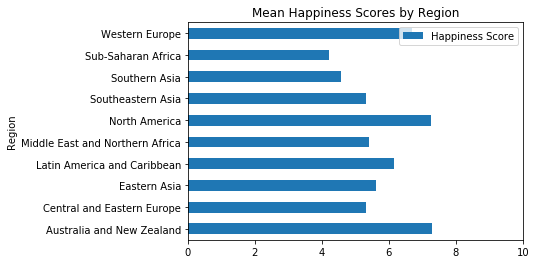

In [31]:
#Use the `df.plot()` method to plot the results.
means.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10))

In [32]:
happiness2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


let's rename the Happiness.Score column so it matches the column name in happiness2015 and happiness2016:

In [33]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

As we are combining more than two dataframes we will use **concat**

In [ ]:
combined = pd.concat([happiness2015,happiness2016,happiness2017])

In [35]:
combined.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Year,Lower Confidence Interval,Upper Confidence Interval,Happiness.Rank,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
pivot_table_combined = combined.pivot_table(index='Year', values='Happiness Score', aggfunc=np.mean)

In [37]:
pivot_table_combined

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


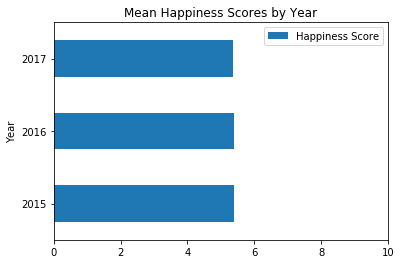

In [38]:
pivot_table_combined.plot(kind='barh', title='Mean Happiness Scores by Year', xlim=(0,10))

World happiness score stayed approximately the same from 2015 to 2017.